<a href="https://colab.research.google.com/github/carlosgarzata/Datasets/blob/main/clase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
path='/content/drive/MyDrive/mic2.xlsx'

In [86]:
import pandas as pd

In [87]:
df=pd.read_excel(path)
df

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree
5,27,Female,Student,"<10,000",3,3,3,3,3,3,...,3,4,Taste,No,.no,Combo_CRC,Chocolate,single flavoured,neutral,agree
6,48,Female,House wife,"<10,000",4,4,4,4,4,4,...,4,4,Taste,No,Texture defect,Combo_VCS,Vanila,single flavoured,neutral,agree
7,15,Female,Student,"<10,000",3,4,4,4,5,5,...,5,5,Taste,No,NaN,Combo_CRC,Caramel,More than one flavoured,agree,agree
8,28,Female,Student,"10,000 - 20,000",3,3,3,4,4,3,...,3,4,Quality,No,Quality issues,Combo_VCS,Chocolate,More than one flavoured,neutral,agree
9,24,Male,Engineer,"<10,000",3,5,4,5,5,5,...,4,5,Quality,No,NaN,Combo_VCS,Chocolate,single flavoured,agree,agree


In [88]:
def custom_cls(x):
  if (0<= x <= 20):
    return '<=20'
  elif (20<= x <= 30):
    return '21-30'
  elif (30< x <= 40):
    return '31-40'
  else:
    return '>40'

In [89]:
df['AgeGP'] = df.apply(lambda tbl:custom_cls(tbl['Age']),
                       axis=1)
df.head(1)

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31-40


In [90]:
mypivot=df.pivot_table(index='AgeGP',
                       values='Price',
                       aggfunc='count')
mypivot


,Price
AgeGP,
21-30,31
31-40,5
<=20,11
>40,3


In [91]:
counts=df['AgeGP'].value_counts().to_frame()
counts

,AgeGP
21-30,31
<=20,11
31-40,5
>40,3


In [92]:
counts.index

Index(['21-30', '<=20', '31-40', '>40'], dtype='object')

In [93]:
counts = counts.reindex(['<=20','21-30','31-40', '>40'])
counts.reset_index(inplace=True)


In [94]:
counts.rename({'index':'AgeGP',
                       'AgeGP':'Counts'}, axis=1,
              inplace=True
)
counts

,AgeGP,Counts
0,<=20,11
1,21-30,31
2,31-40,5
3,>40,3


In [95]:
import matplotlib.pyplot as plt


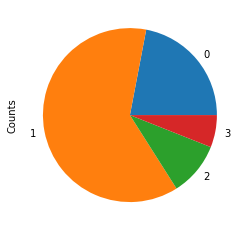

In [98]:
counts['Counts'].plot(kind='pie')


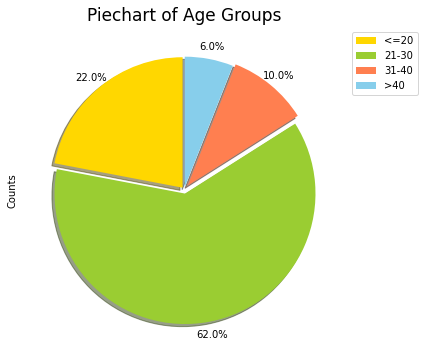

In [99]:
favCls=['gold','yellowgreen','coral','skyblue','lightgreen']
explodeDist=[0.02,0.03,0.04,0.02]
counts['Counts'].plot(kind='pie',
                     figsize=(15,6),
                     labels= None,
                     startangle=90,
                     autopct='%1.1f%%',
                     pctdistance=1.1,
                     shadow=True,
                     colors=favCls,
                     explode=explodeDist
)
plt.legend(labels=counts.AgeGP,bbox_to_anchor=(1,1.0))
plt.title('Piechart of Age Groups',fontsize=17);

In [103]:
x=df.pivot_table(index=['AgeGP','Sex'],
               values='Price',
               aggfunc='count'
).reset_index()
x.head()

x.columns

Index(['AgeGP', 'Sex', 'Price'], dtype='object')

In [105]:
import plotly.express as px

In [106]:
fig=px.sunburst(x,
                path = ['AgeGP','Sex'],
                values='Price'
)
fig.show()